# 1. Exploratory Data Analysis

We'll first use the [table one package](https://colab.research.google.com/github/tompollard/tableone/blob/master/tableone.ipynb) as an example of tabular data exploration, and then we encourage you to use Matplotlib (or any other data visualization package), by showing you an example of how to prompt ChatGPT to give us Python code to produce the plots we want!

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import tableone
try:
    from tableone import TableOne
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne

## Define your working directory

In [3]:
# replace this with yours
os.chdir("/Users/joaomatos/Documents/mit-brown-datathon")

## Load train data

let's look at the train data *only* to simulate a real setup, where we don't get to look at the test set

In [4]:
data = pd.read_csv('data_split/wids_train.csv')

In [5]:
data.head()

,Unnamed: 0,encounter_id,patient_id,hospital_id,age,ethnicity,gender,bmi,icu_admit_source,icu_type,...,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,hospital_death,d1_spo2_min_new,d1_lactate_max_new,d1_spo2_min,d1_lactate_max
0,4609,59954,90449,118,86.0,Caucasian,M,28.168975,Accident & Emergency,Neuro ICU,...,4.1,4.10,NaN,NaN,NaN,0,97.0,NaN,97.0,NaN
1,75674,63518,19384,185,72.0,Caucasian,M,36.635088,Accident & Emergency,Med-Surg ICU,...,4.6,4.00,141.0,125.0,16.7,1,99.0,13.70,99.0,13.70
2,84022,34401,20558,188,36.0,African American,M,27.459684,Accident & Emergency,MICU,...,NaN,NaN,NaN,NaN,NaN,0,100.0,NaN,93.0,NaN
3,38035,71581,112066,62,60.0,Caucasian,M,21.977351,Accident & Emergency,MICU,...,5.5,4.06,143.0,136.4,13.8,0,90.0,3.15,90.0,3.15
4,24371,29019,129440,161,27.0,Caucasian,F,19.960244,Accident & Emergency,Med-Surg ICU,...,4.1,2.90,139.0,134.0,45.0,0,94.0,NaN,94.0,NaN


In [6]:
# use this line below to see all the columns as a list of strings
# data.columns.tolist()

In [7]:
# or alternatively plot them all
# with pd.option_context('display.max_columns', None):
#     display(data.head())

## Build a basic Table 1

modify these lists with the variables you're interested in!

In [8]:
columns = ['age', 'bmi', 'ethnicity', 'gender', 'hospital_death']

categorical = ['gender', 'ethnicity']

groupby = ['hospital_death']

nonnormal = ['bmi']

# this renames the variables
labels = {
    'hospital_death': "Mortality",
    'age': "Age",
    'ethnicity': "Race and Ethnicity",
    'bmi': "BMI",
    'gender': "Sex",
}

# this re-orders categorical variables
order = {
    'gender': ["F","M"]
}

# and then we can limit to a certain number of classes
limit = {
    'gender': 1
}


In [9]:
table1 = TableOne(
    data,
    columns=columns,
    categorical=categorical,
    groupby=groupby,
    nonnormal=nonnormal,
    rename=labels, 
    limit=limit,
    order=order,
    overall=True,
    missing=True,
    pval=True,
    decimals=2,
)

In [10]:
display(table1)

Grouped by Mortality                                                                       
                                                        Missing              Overall                    0                    1 P-Value
n                                                                              73370                67042                 6328        
Age, mean (SD)                                             3387        62.27 (16.77)        61.71 (16.86)        68.40 (14.39)  <0.001
BMI, median [Q1,Q3]                                        2766  27.68 [23.66,32.96]  27.79 [23.76,33.02]  26.65 [22.58,32.29]  <0.001
Race and Ethnicity, n (%) African American                 1106         7572 (10.48)         6970 (10.56)           602 (9.64)   0.176
                          Asian                                           899 (1.24)           825 (1.25)            74 (1.18)        
                          Caucasian                                    56609 (78.34)        51659 (78.25)         4950 (79.24)        
                          Hispanic                                       3026 (4.19)          2748 (4.16)           278 (4.45)        
                          Native American                                 645 (0.89)           589 (0.89)            56 (0.90)        
                          Other/Unknown                                  3513 (4.86)          3226 (4.89)           287 (4.59)        
Sex, n (%)                F                                  17        33783 (46.06)        30796 (45.94)         2987 (47.26)   0.047

In [11]:
# your own table one, with more variables!

## Plot some visualizations!

[ChatGPT](https://chatgpt.com/) can be very helpful here ;)

This was my prompt:

```
I have a dataframe in Python called "data".
I want a bar plot on mortality, defined as 'hospital_death', per ethnic group, defined in a column called 'ethnicity'.
Please provide me matplotlib code.

```


And this was GPT-3.5's output -- will it work? :)

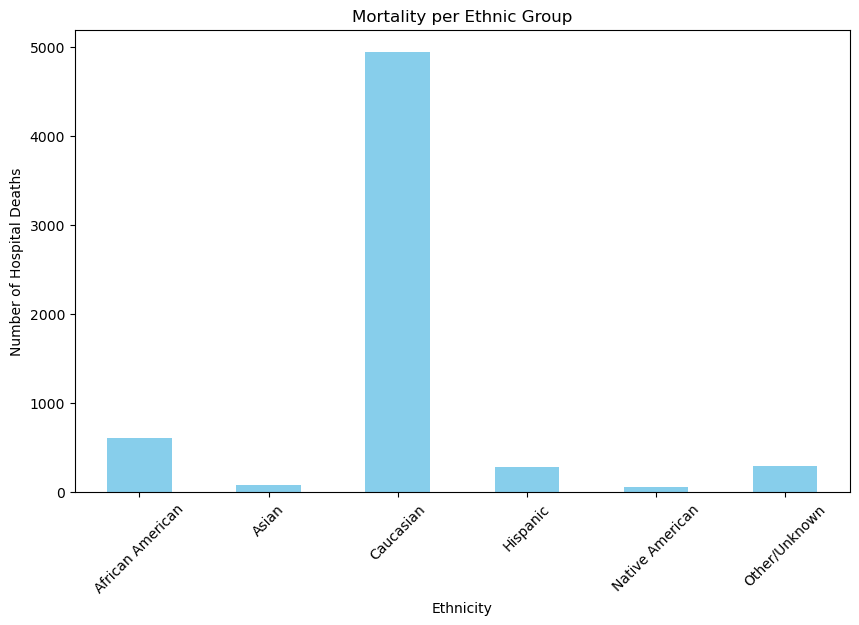

In [12]:
# (commenting these because we've already done this above)
# import pandas as pd
# import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# If not already loaded, you can load your data like this:
# data = pd.read_csv('your_data.csv')

# Group by 'ethnicity' and calculate the sum of 'hospital_death' for each group
mortality_per_ethnicity = data.groupby('ethnicity')['hospital_death'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
mortality_per_ethnicity.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Number of Hospital Deaths')
plt.title('Mortality per Ethnic Group')

# Display the plot
plt.xticks(rotation=45)
plt.show()


It did work!! But now I realize that this should be normalized by the number of patients per ethnic group, otherwise we cannot extract much from the plot.

So, here's my new prompt:

```
can we please make this normalized by the number of patients per ethnic group, i.e, take the mean instead of the sum?

```

Will it work? This was the new output:

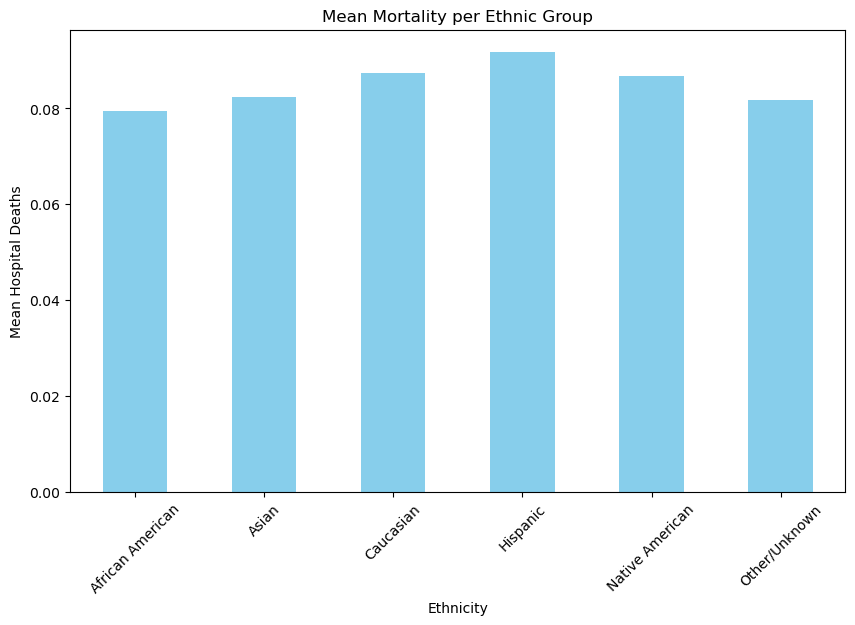

In [13]:
mortality_per_ethnicity = data.groupby('ethnicity')['hospital_death'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
mortality_per_ethnicity.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Mean Hospital Deaths')
plt.title('Mean Mortality per Ethnic Group')

# Display the plot
plt.xticks(rotation=45)
plt.show()

This makes a whole lot more sense!! Explore this with other plots you may be interested ;)

In [14]:
# your other plots!!!